In [ ]:
#cHRISTOPHER NEWBOLT

In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys. Place your keys here.
from config import api_keyTwitter
from config import api_secretTwitter
from config import access_tokenTwitter
from config import access_tokensecretTwitter

# Setup Tweepy API Authentication

auth = tweepy.OAuthHandler(api_keyTwitter, api_secretTwitter)
auth.set_access_token(access_tokenTwitter, access_tokensecretTwitter)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [ ]:
3Observations:
    # CNN IS CONSIDERED VERY NEGATIVE AND BBC IS HTE MOST POSITIVE
    #WHILE CBS SEEMS TO HAVE ALOT OF REALLY POSITVE SENTIMENTS, OVERALL THEY ARE NOT THAT OVERLY POSITIVE. 
    # FOX NEWS SEEMS TO HAVE THE MOST NEUTRAL SENTIMENTS. 

In [2]:
#Your final Jupyter notebook must:


#Pull last 100 tweets from each outlet.
#Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
#Pull into a DataFrame the tweet's source acount, its text, its date,
    #and its compound, positive, neutral, and negative sentiment scores.
#Export the data in the DataFrame into a CSV file.
#Save PNG images for each plot.

In [4]:
##==============================================================================================================
#The functions of this cell are:
    #1. This cell pulls the lass 100 tweets from each outlet
    #2. Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
##==============================================================================================================
#target_user = ("@CNNbrk")                                      #only used for trouble shooting. 
#now = datetime.datetime.now()                                      #Stores current datetime info
target_user = ("@CNNbrk","@BBC","@CBS", "@FOXTV", "@nytimes")# Target Account = BBC, CBS, CNN, Fox, and New York times
sentiments = []                                         # Variables for holding sentiments


for network in target_user:    
    counter = 1                                           # Counter
   
   # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    #Arrays for gathering date and time
    tweet_array=[]
    TweetInfo=[]
    TweetTime=[]
    TweetTimeObj=[]
    #arrays for gathering words
    Tweet_words=[]  
    Tweeter=[]
    
    
    for x in range(5):                                                   # Loop through 5 pages of tweets (total 100 tweets)
       
        public_tweets = api.user_timeline(network)         # Get all tweets from home feed
        #public_tweets = api.user_timeline(target_user)         # Get all tweets from home feed
        
        for tweet in public_tweets:                                       # Loop through all tweets
   
            # Print Tweets
            # print("Tweet %s: %s" % (counter, tweet["text"]))

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            #print(tweet["user"]["screen_name"])
           
            info=tweet["created_at"]                       #tweet info
            readtweet= tweet["text"].encode("UTF-8")  #tweet
            
            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
               # other arrays
            tweet_array.append(tweets_ago) #counts tweets
            TweetInfo.append(info)         # date
            Tweet_words.append(readtweet)   # stores tweet
            Tweeter.append(network)
            counter = counter + 1            #adds counter
        
            # Add sentiments for each tweet into an array
            sentiments.append({"Network News": network,
                              # "Tweeter ID": tweet["user"],
                               "Date": info, 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweet Number": tweets_ago,                             
                               "Tweet": readtweet})

            for x in range(len(TweetInfo)):
                tweet_datetime = datetime.strptime(TweetInfo[x],"%a %b %d %H:%M:%S %z %Y")
                TweetTimeObj.append(tweet_datetime)
                            
 

In [5]:
sentiments

[{'Compound': -0.6705,
  'Date': 'Sat Mar 24 14:15:48 +0000 2018',
  'Negative': 0.569,
  'Network News': '@CNNbrk',
  'Neutral': 0.313,
  'Positive': 0.117,
  'Tweet': b'Students are leading marches around the country, demanding stricter gun laws and honoring the 17 people killed in t\xe2\x80\xa6 https://t.co/509yIzlf3E',
  'Tweet Number': 1},
 {'Compound': -0.4767,
  'Date': 'Sat Mar 24 06:39:21 +0000 2018',
  'Negative': 0.86,
  'Network News': '@CNNbrk',
  'Neutral': 0.14,
  'Positive': 0.0,
  'Tweet': b'A French police officer who asked a gunman to let him take the place of a hostage in a supermarket attack has died.\xe2\x80\xa6 https://t.co/ftjQOdi7fc',
  'Tweet Number': 2},
 {'Compound': 0.3182,
  'Date': 'Sat Mar 24 03:53:15 +0000 2018',
  'Negative': 0.881,
  'Network News': '@CNNbrk',
  'Neutral': 0.0,
  'Positive': 0.119,
  'Tweet': b"North Korea accepts South Korea\xe2\x80\x99s proposal to hold high-level talks on March 29, Seoul's Unification Ministry says\xe2\x80\xa6 http

In [6]:
##==============================================================================================================
#The functions of this cell are:
    #1. #Pull into a DataFrame the tweet's source account, its text, its date,
         #and its compound, positive, neutral, and negative sentiment scores.
    #2. Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
##==============================================================================================================
#sentiments_pd = pd.DataFrame(sentiments)          # Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)  

#sentiments_pd.head()
sentiments_pd

,Compound,Date,Negative,Network News,Neutral,Positive,Tweet,Tweet Number
0,-0.6705,Sat Mar 24 14:15:48 +0000 2018,0.569,@CNNbrk,0.313,0.117,b'Students are leading marches around the coun...,1
1,-0.4767,Sat Mar 24 06:39:21 +0000 2018,0.860,@CNNbrk,0.140,0.000,b'A French police officer who asked a gunman t...,2
2,0.3182,Sat Mar 24 03:53:15 +0000 2018,0.881,@CNNbrk,0.000,0.119,"b""North Korea accepts South Korea\xe2\x80\x99s...",3
3,-0.5574,Sat Mar 24 02:24:31 +0000 2018,0.833,@CNNbrk,0.167,0.000,b'RT @CNNPolitics: The White House announces a...,4
4,-0.4215,Fri Mar 23 22:20:28 +0000 2018,0.877,@CNNbrk,0.123,0.000,b'NFL star Michael Bennett was indicted in Hou...,5
5,-0.0772,Fri Mar 23 22:07:59 +0000 2018,0.769,@CNNbrk,0.121,0.109,b'A Tennessee man who was wrongfully imprisone...,6
6,-0.9432,Fri Mar 23 20:59:44 +0000 2018,0.464,@CNNbrk,0.536,0.000,b'RT @CNNPolitics: A man has been arrested for...,7
7,-0.6486,Fri Mar 23 20:42:06 +0000 2018,0.777,@CNNbrk,0.223,0.000,"b'An Iowa family vacationing in Tulum, Mexico,...",8
8,-0.8519,Fri Mar 23 20:08:33 +0000 2018,0.659,@CNNbrk,0.341,0.000,b'RT @CNNMoney: Trade war fears sink stocks ag...,9
9,-0.6486,Fri Mar 23 17:52:50 +0000 2018,0.791,@CNNbrk,0.209,0.000,b'President Trump says he\'s signed the spendi...,10


In [7]:
#create_date = "{:%m-%d-%Y}".format(date.today())


In [8]:
##==============================================================================================================
#Export the data in the DataFrame into a CSV file.
##==============================================================================================================

sentiments_pd.to_csv('Output/Newbolt_SentimentsFile.csv')   #Prints to an output csv

In [9]:
# These Dataframes will be used to make the unique scatter plots... Can this be put in a for loop as well?
#target_user = ("@CNNbrk","@BBC","@CBS", "@FOXTV", "@nytimes" ) 
CNN_df = sentiments_pd.loc[sentiments_pd["Network News"] == "@CNNbrk"]
BBC_df = sentiments_pd.loc[sentiments_pd["Network News"] == "@BBC"]
CBS_df = sentiments_pd.loc[sentiments_pd["Network News"] == "@CBS"]
FOX_df = sentiments_pd.loc[sentiments_pd["Network News"] == "@FOXTVk"]
NYT_df = sentiments_pd.loc[sentiments_pd["Network News"] == "@nytimes"]
#nyTimes_df
#BBC_df
#CBS_df
#CNNTWEET_count= CNN_df(["Network"]).count(["@CNNbrk"])
#CNNTWEET_count = CNN_df.groupby(["city"]).count()["ride_id"]
#urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
#CNNTWEET_count
#CNN_df.columns

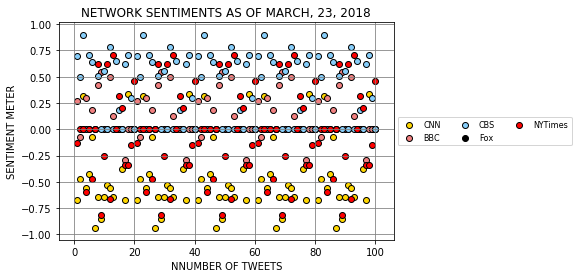

In [10]:
a=plt.scatter(CNN_df["Tweet Number"], CNN_df["Compound"], c='gold', edgecolor="black")
b=plt.scatter(BBC_df["Tweet Number"], BBC_df["Compound"], c='lightcoral', edgecolor="black")
c=plt.scatter(CBS_df["Tweet Number"], CBS_df["Compound"], c='lightskyblue', edgecolor="black")
d=plt.scatter(FOX_df["Tweet Number"], FOX_df["Compound"], c='black', edgecolor="black")
e=plt.scatter(NYT_df["Tweet Number"], NYT_df["Compound"], c='red', edgecolor="black")

plt.title("NETWORK SENTIMENTS AS OF MARCH, 24, 2018")
plt.xlabel("NNUMBER OF TWEETS")
plt.ylabel("SENTIMENT METER")

plt.legend((a, b, c, d, e), ('CNN', 'BBC', 'CBS', 'Fox', 'NYTimes'), scatterpoints=1,
            loc='center left',
            bbox_to_anchor=(1, 0.5),
            ncol=3,
            fontsize=8)

#plt.annotate('Bubble size represents number of Drivers per City', xy=(35, 40), xytext=(20, 3),)  # Adding note about hte third dataset
plt.grid(b=True, which = 'major', color ='gray', linestyle='-')
plt.savefig("Network Sentiment analysis")
plt.show()

In [14]:
#BAR CHART DATAFRAMES
tcnn = CNN_df['Compound'].sum()
tcbs = CBS_df['Compound'].sum()
tfox = FOX_df['Compound'].sum()
tbbc = BBC_df['Compound'].sum()
tnyt = NYT_df['Compound'].sum()

com_val = [tcnn,tbbc,tcbs,tfox,tnyt]

x_axis = np.arange(len(com_val))
barlist=plt.bar(x_axis, com_val, align = "edge")
#Setting colors
barlist[0].set_color("gold")
barlist[1].set_color("lightcoral")
barlist[2].set_color("lightskyblue")
barlist[3].set_color("black")
barlist[4].set_color("red")


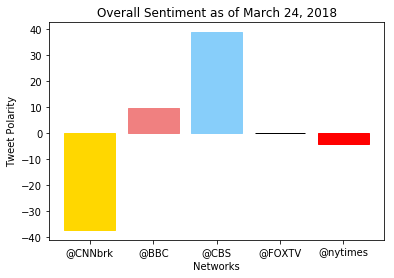

In [15]:
tick_locations = [value +.4 for value in x_axis]
plt.xticks(tick_locations, target_user)

plt.title("Overall Sentiment as of March 24, 2018")
plt.xlabel("Networks")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Network News Sentiment Analysis")
plt.show(barlist)